In [33]:
import os
import numpy as np
import scipy.io as sio
import cv2
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from multiprocessing import Process

In [3]:
def eucledian_distance(a, b):
    return np.linalg.norm(a-b)
    # return cdist(a, b, 'euclidean')

In [71]:
def find_peak(data, idx, r):
    point = data[:, idx]
    
    while True:
        window_points = []
        for i, data_point in enumerate(data.T):
            distance = eucledian_distance(data_point, point)
            if distance <= r:
                window_points.append(i)
        
        if len(window_points) == 0:
            return point
        
        new_mean = np.mean(data[:, window_points], axis=1)
        
        if np.linalg.norm(new_mean - point) < 0.01:
            return new_mean
        
        point = new_mean


In [17]:
def mean_shift_working(data, r):
    labels = np.zeros(data.shape[1])
    peaks = []
    print(data.shape)
    
    for i in range(data.shape[1]):
        if labels[i] == 0:
            peak = find_peak(data, i, r)
            
            # Check if the peak is already in peaks
            existing_peak = None
            for j, p in enumerate(peaks):
                if np.linalg.norm(p - peak) < r / 2:
                    existing_peak = p
                    break
            
            if existing_peak is None:
                peaks.append(peak)
                label = len(peaks)
            else:
                peak = existing_peak
                label = j + 1
            
            labels[i] = label
    
    return labels, np.array(peaks).T


In [18]:
def mean_shift(data, r):
    labels = np.zeros(data.shape[1])
    peaks = []
    
    for i in range(data.shape[1]):
        if labels[i] == 0:
            peak = find_peak(data, i, r)
            peak_found = False
            
            # Check if the peak is similar to any existing peaks
            for j in range(len(peaks)):
                if eucledian_distance(peak, peaks[j]) <= r/2:
                    labels[i] = j + 1
                    peak_found = True
                    break
            
            # If the peak is not similar to any existing peaks, assign a new label
            if not peak_found:
                labels[i] = len(peaks) + 1
                peaks.append(peak)
    
    return labels, np.array(peaks).T

In [19]:
def mean_shift_basin(data, r):
    labels = np.zeros(data.shape[1])
    peaks = []
    print(data.shape)

    for i in range(data.shape[1]):
        # if(i%10 == 0):
        # print(i)
        if labels[i] == 0:
            point = data[:, i]
            peak_found = False
            for j in range(len(peaks)):
                dist = eucledian_distance(point, peaks[j])
                if dist <= r:
                    labels[i] = j + 1
                    peak_found = True
                    break

            if not peak_found:
                peak = find_peak(data, i, r)
            else:
                continue

            # Check if the peak is similar to any existing peaks
            for j in range(len(peaks)):
                if eucledian_distance(peak, peaks[j]) <= r/2:
                    labels[i] = j + 1
                    peak_found = True
                    break

            # If the peak is not similar to any existing peaks, assign a new label
            if not peak_found:
                labels[i] = len(peaks) + 1
                peaks.append(peak)

    return labels, np.array(peaks).T

In [9]:
mat = sio.loadmat('data/pts.mat')
data = mat['data']
# print(data.shape[0])
labels, peaks = mean_shift_working(data, 2)
print(len(labels))
print(peaks)

2000
[[-0.06046138  5.04117411]
 [ 0.04867883  4.97963107]
 [ 0.03396371  5.01299414]]


In [67]:
mat = sio.loadmat('data/pts.mat')
data = mat['data']
# print(data.shape[0])
labels, peaks = mean_shift_basin(data, 2)
print(len(labels))
print(peaks)

(3, 2000)
2000
[[-0.06046138  5.04117411]
 [ 0.04867883  4.97963107]
 [ 0.03396371  5.01299414]]


(3, 38400)
(38400,)


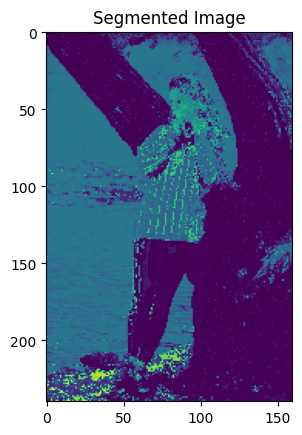

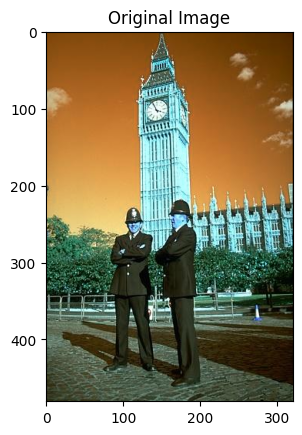

(3, 38400)
(38400,)


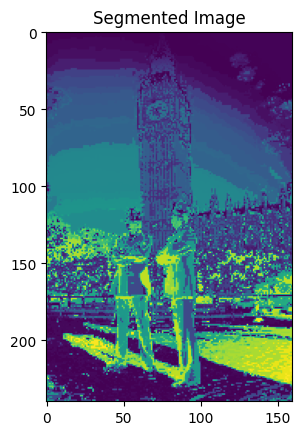

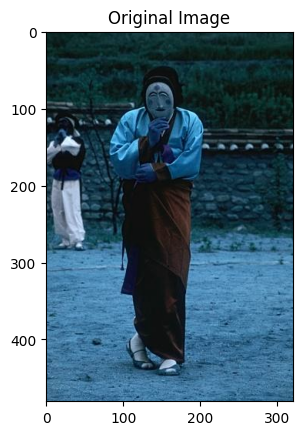

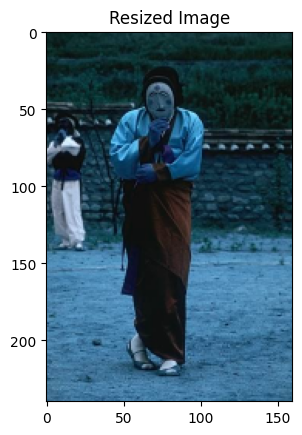

(3, 38400)
(38400,)


In [39]:
for i in range(3):
    # Load the color image
    if i == 0:
        image = cv2.imread('data/lady_leaning_on_tree.jpeg')
    elif i == 1:
        image = cv2.imread('data/big_ben.jpeg')
    elif i == 2:
        image = cv2.imread('data/masked_man.jpeg')

    plt.imshow(image)
    plt.title('Original Image')
    plt.show()

    resized = cv2.resize(image, (0, 0), fx=0.5, fy=0.5)
    # resized = cv2.cvtColor(resized, cv2.COLOR_RGB2LAB)

    imgplot = plt.imshow(resized)
    plt.title('Resized Image')
    plt.show()

    # Reshape the image into a 3-by-p array
    data = resized.reshape((-1, 3)).T.astype(np.float32)

    # Apply the Mean-shift algorithm
    r = 10  # Window radius
    labels, peaks = mean_shift_basin(data, r)
    print(labels.shape)
    # Reshape the labels array to match the original image dimensions
    segmented_image = labels.reshape(resized.shape[:2])
    # segmented_image = cv2.cvtColor(segmented_image, cv2.COLOR_LAB2RGB)

    # Visualize the segmented image
    imgplot = plt.imshow(segmented_image)
    plt.title('Segmented Image')
    plt.show()

In [115]:
def assign_segment_colors(labels):
    # Assign a random color to each segment
    num_segments = np.max(labels) + 1
    # num_segments = num_segments.astype(np.uint8)
    colors = np.random.randint(0, 256, (num_segments.astype(np.uint8), 3), dtype=np.uint8)
    colored_labels = colors[labels.astype(int) % len(colors)]
    return colored_labels

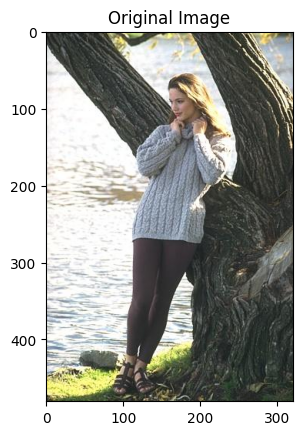

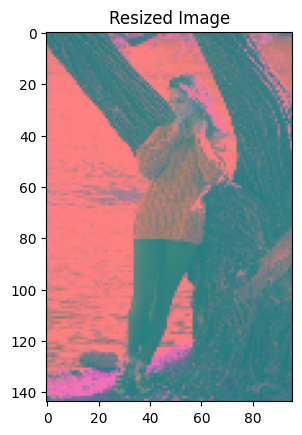

(3, 13824)


KeyboardInterrupt: 

In [103]:
for i in range(3):
    # Load the color image
    if i == 0:
        image = cv2.imread('data/lady_leaning_on_tree.jpeg')
    elif i == 1:
        image = cv2.imread('data/big_ben.jpeg')
    elif i == 2:
        image = cv2.imread('data/masked_man.jpeg')

    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.show()

    resized = cv2.resize(image, (0, 0), fx=0.3, fy=0.3)
    lab_image = cv2.cvtColor(resized, cv2.COLOR_BGR2LAB)

    imgplot = plt.imshow(lab_image)
    plt.title('Resized Image')
    plt.show()

    # Reshape the image into a 3-by-p array
    data = lab_image.reshape((-1, 3)).T.astype(np.float32)

    # Apply the Mean-shift algorithm
    r = 30  # Window radius
    labels, peaks = mean_shift_basin(data, r)
    print(labels.shape)

    segmented_image = labels.reshape(lab_image.shape[:2])

    # Assign colors to segments
    colored_image = assign_segment_colors(segmented_image)

    print(segmented_image.shape)
    segmented_image_rgb = cv2.cvtColor(colored_image.astype(np.uint8), cv2.COLOR_LAB2RGB)
    # segmented_image_rgb = cv2.cvtColor(segmented_image_rgb, cv2.COLOR_BGR2RGB)

    # Visualize the segmented image
    imgplot = plt.imshow(segmented_image_rgb)
    plt.title('Segmented Image')
    plt.show()

In [105]:
def find_peak_opt(data, idx, r, c):
    point = data[:, idx]
    cpts = np.zeros(data.shape[1], dtype=bool)

    while True:
        window_points = []
        window_points_cpts = []
        for i, data_point in enumerate(data.T):
            distance = eucledian_distance(data_point, point)
            if distance <= r:
                window_points.append(i)
            # if distance <= r / c:
            #     window_points_cpts.append(i)

        if len(window_points) == 0:
            return point, cpts

        new_mean = np.mean(data[:, window_points], axis=1)

        if np.linalg.norm(new_mean - point) < 0.01:
            # cpts[window_points_cpts] = True
            for i in window_points:
                if eucledian_distance(data[:, i], new_mean) <= r / c:
                    cpts[i] = True
            return new_mean, cpts

        point = new_mean


In [106]:
def find_peak_opt2(data, idx, r, c):
    point = data[:, idx]
    cpts = np.zeros(data.shape[1], dtype=bool)

    while True:
        distance = np.linalg.norm(data - point.reshape(-1, 1), axis=0)
        window_points = np.where(distance <= r)[0]

        if len(window_points) == 0:
            return point, cpts

        new_mean = np.mean(data[:, window_points], axis=1)

        if np.linalg.norm(new_mean - point) < 0.01:
            distances = np.linalg.norm(data[:, window_points] - new_mean[:, np.newaxis], axis=0)
            cpts[window_points[distances <= r / c]] = True
            return new_mean, cpts

        point = new_mean

In [111]:
def mean_shift_opt(data, r, c):
    labels = np.zeros(data.shape[1])
    peaks = []
    print(data.shape)

    for i in range(data.shape[1]):
        if labels[i] == 0:
            point = data[:, i]
            peak_found = False
            for j in range(len(peaks)):
                dist = eucledian_distance(point, peaks[j])
                if dist <= r:
                    labels[i] = j + 1
                    peak_found = True
                    break

            if not peak_found:
                peak, cpts = find_peak_opt2(data, i, r, c)
            else:
                continue

            # Check if the peak is similar to any existing peaks
            for j in range(len(peaks)):
                if eucledian_distance(peak, peaks[j]) <= r/2:
                    labels[i] = j + 1
                    peak_found = True
                    break

            # If the peak is not similar to any existing peaks, assign a new label
            if not peak_found:
                labels[i] = len(peaks) + 1
                peaks.append(peak)
                labels[cpts] = len(peaks)

    return labels, np.array(peaks).T

In [110]:
def mean_shift_opt2(data, r, c=4):
    labels = np.zeros(data.shape[1])
    peaks = []
    print(data.shape)

    for i in range(data.shape[1]):
        if labels[i] == 0:
            point = data[:, i]
            peak_found = False
            dist = np.linalg.norm(data - point.reshape(-1, 1), axis=0)
            peak_indices = np.where(dist <= r)[0]
            if len(peak_indices) > 0:
                labels[i] = peak_indices[0] + 1
                peak_found = True

            if not peak_found:
                peak, cpts = find_peak_opt2(data, i, r, c)
                peaks.append(peak)
                labels[cpts] = len(peaks)

            # Check if the peak is similar to any existing peaks
            dist = np.linalg.norm(data - point.reshape(-1, 1), axis=0)
            peak_indices = np.where(dist <= r/2)[0]
            if len(peak_indices) > 0:
                labels[i] = peak_indices[0] + 1

    return labels, np.array(peaks).T

In [122]:
def assign_segment_colors2(labels, image):
    num_segments = int(np.max(labels)) + 1
    colors = np.zeros((num_segments, 3), dtype=np.uint8)
    
    for segment in range(num_segments):
        mask = labels == segment
        segment_pixels = image[mask]
        colors[segment] = np.mean(segment_pixels, axis=0)
    
    colored_labels = colors[labels.astype(int)]
    return colored_labels


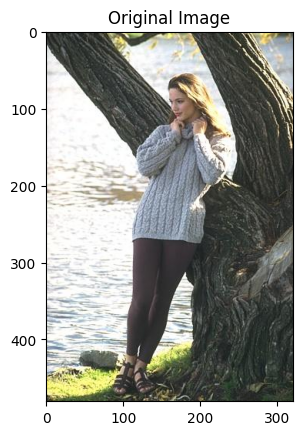

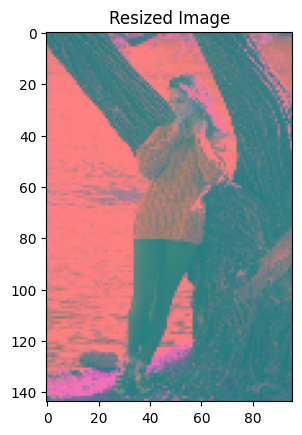

(3, 13824)
(13824,)
(144, 96)


/var/folders/q4/xrd4plsd2sx77fkdqxkjv_9m0000gn/T/ipykernel_49726/2819769287.py:8: RuntimeWarning: invalid value encountered in cast
  colors[segment] = np.mean(segment_pixels, axis=0)


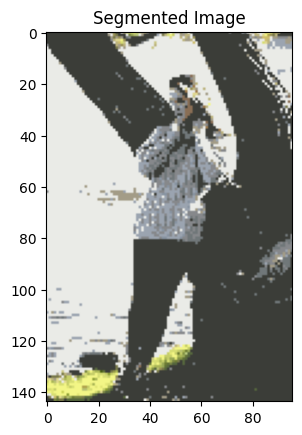

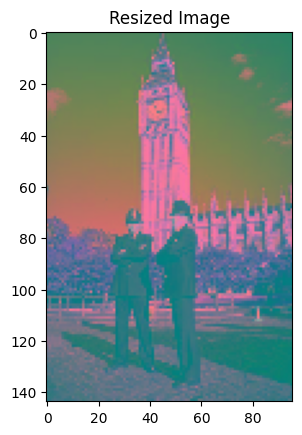

(3, 13824)
(13824,)
(144, 96)


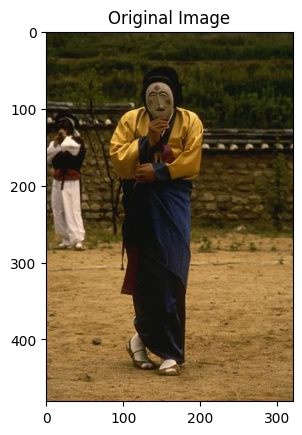

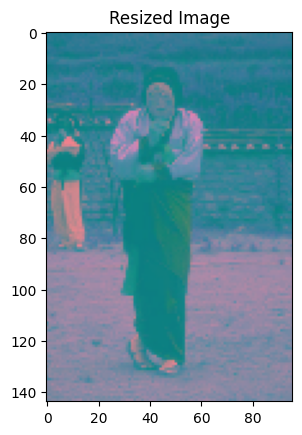

(3, 13824)
(13824,)
(144, 96)


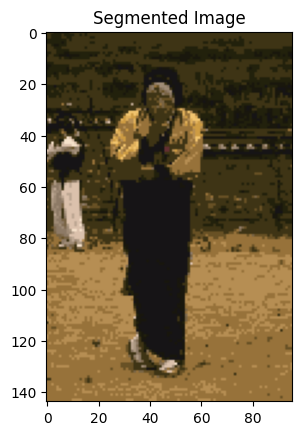

In [123]:
for i in range(3):
    # Load the color image
    if i == 0:
        image = cv2.imread('data/lady_leaning_on_tree.jpeg')
    elif i == 1:
        image = cv2.imread('data/big_ben.jpeg')
    elif i == 2:
        image = cv2.imread('data/masked_man.jpeg')

    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.show()

    resized = cv2.resize(image, (0, 0), fx=0.3, fy=0.3)
    lab_image = cv2.cvtColor(resized, cv2.COLOR_BGR2LAB)

    plt.imshow(lab_image)
    plt.title('Resized Image')
    plt.show()

    # Reshape the image into a 3-by-p array
    data = lab_image.reshape((-1, 3)).T.astype(np.float32)

    rows, cols = lab_image.shape[:2]

    # Create x and y coordinate matrices
    x, y = np.meshgrid(range(cols), range(rows))

    # Flatten the x and y matrices
    x = x.flatten()
    y = y.flatten()

    # Concatenate x, y, and data arrays along the first axis
    data = np.concatenate([x[:, np.newaxis], y[:, np.newaxis], data], axis=1)

    # Apply the Mean-shift algorithm
    r = 10  # Window radius
    c = 4
    labels, peaks = mean_shift_opt(data, r, c)
    print(labels.shape)

    segmented_image = labels.reshape(lab_image.shape[:2])

    # Assign colors to segments
    colored_image = assign_segment_colors2(segmented_image, lab_image)

    print(segmented_image.shape)
    segmented_image_rgb = cv2.cvtColor(colored_image.astype(np.uint8), cv2.COLOR_LAB2RGB)
    # segmented_image_rgb = cv2.cvtColor(segmented_image_rgb, cv2.COLOR_BGR2RGB)

    # Visualize the segmented image
    plt.imshow(segmented_image_rgb)
    plt.title('Segmented Image')
    plt.show()

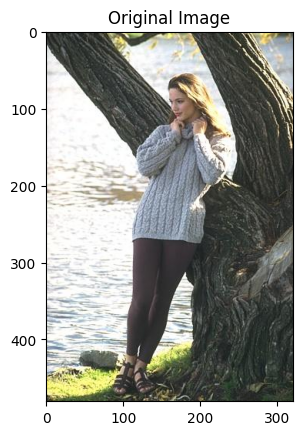

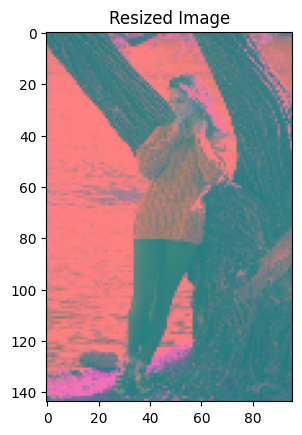

(5, 13824)
(13824,)
(144, 96)


/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/homebrew/lib/python3.11/site-packages/numpy/core/_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/var/folders/q4/xrd4plsd2sx77fkdqxkjv_9m0000gn/T/ipykernel_49726/2819769287.py:8: RuntimeWarning: invalid value encountered in cast
  colors[segment] = np.mean(segment_pixels, axis=0)


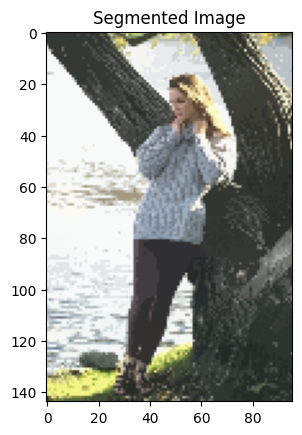

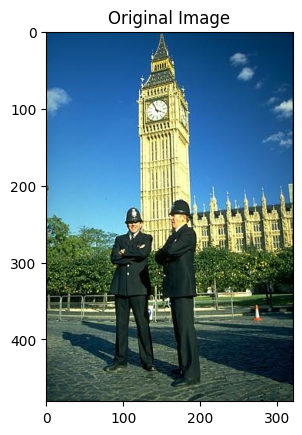

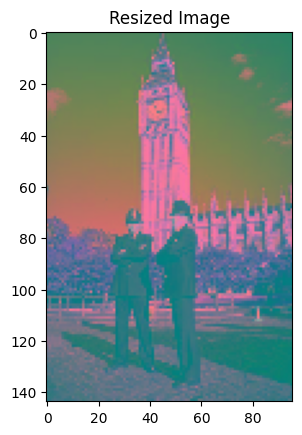

(5, 13824)
(13824,)
(144, 96)


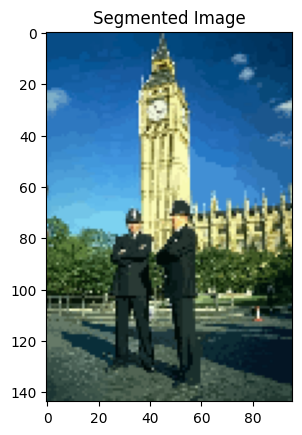

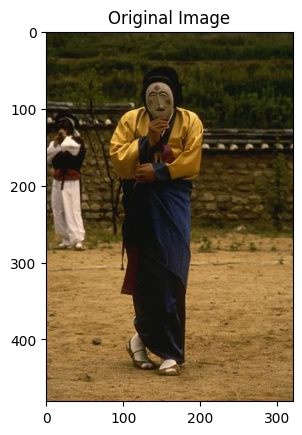

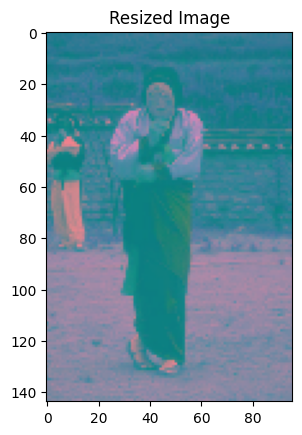

(5, 13824)
(13824,)
(144, 96)


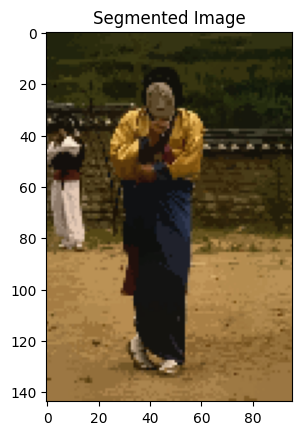

In [125]:
for i in range(3):
    # Load the color image
    if i == 0:
        image = cv2.imread('data/lady_leaning_on_tree.jpeg')
    elif i == 1:
        image = cv2.imread('data/big_ben.jpeg')
    elif i == 2:
        image = cv2.imread('data/masked_man.jpeg')

    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.show()

    resized = cv2.resize(image, (0, 0), fx=0.3, fy=0.3)
    lab_image = cv2.cvtColor(resized, cv2.COLOR_BGR2LAB)

    plt.imshow(lab_image)
    plt.title('Resized Image')
    plt.show()

    # Reshape the image into a 3-by-p array
    colours = lab_image.reshape((-1, 3)).T.astype(np.float32)

    # Extract spatial coordinates
    height, width, _ = lab_image.shape
    x_coords, y_coords = np.indices((height, width)).astype(np.float32)

    # Reshape the coordinates to match the shape of the color values
    x_coords = x_coords.reshape(-1)
    y_coords = y_coords.reshape(-1)

    # Create the 5-by-p data matrix
    data = np.vstack((x_coords, y_coords, colours))

    # Apply the Mean-shift algorithm
    r = 10  # Window radius
    c = 4
    labels, peaks = mean_shift_opt(data, r, c)
    print(labels.shape)

    segmented_image = labels.reshape(lab_image.shape[:2])

    # Assign colors to segments
    colored_image = assign_segment_colors2(segmented_image, lab_image)

    print(segmented_image.shape)
    segmented_image_rgb = cv2.cvtColor(colored_image.astype(np.uint8), cv2.COLOR_LAB2RGB)
    # segmented_image_rgb = cv2.cvtColor(segmented_image_rgb, cv2.COLOR_BGR2RGB)

    # Visualize the segmented image
    plt.imshow(segmented_image_rgb)
    plt.title('Segmented Image')
    plt.show()

In [129]:
mat = sio.loadmat('data/pts.mat')
data = mat['data']
# print(data.shape[0])
labels, peaks = mean_shift_working(data, 2)
print(len(labels))
print(peaks)

(3, 2000)
2000
[[-0.06046138  5.04117411]
 [ 0.04867883  4.97963107]
 [ 0.03396371  5.01299414]]


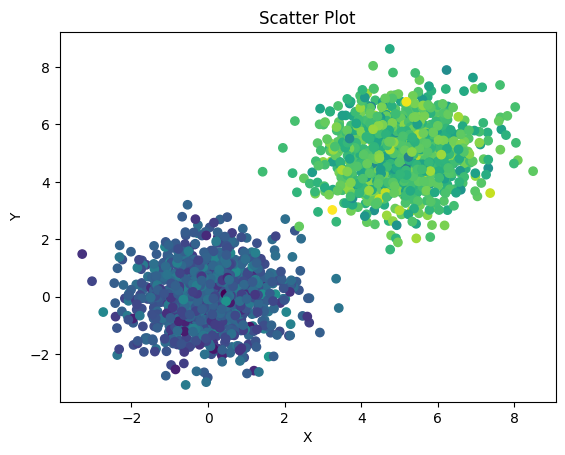

In [128]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random 3x2000 data
# data = np.random.randn(3, 2000)

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the data using a scatter plot
ax.scatter(data[0], data[1], c=data[2], cmap='viridis')
# ax.scatter(data[0], data[1], c=labels, cmap='viridis')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Scatter Plot')

# Show the plot
plt.show()